## Torch.nn Module

The `torch.nn` module in Pytorch is a core library that provides a wide array of classes and functions designed to help developers build a neural network efficiently and effectively. It abstracts the complexity of creating and training neural etworks by offering a pre-built layers, loss functions, activation functions and other utilities, enabling you to focus on desgining and expermenting with model acrhitecture

## Create a Model

Let's create a neural network and understand things along the way.

Initially our model will be a simple neural network which will take five inputs and have only one neuron.

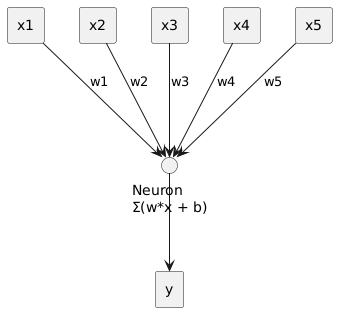

In [4]:
import torch
import torch.nn as nn


class Model(nn.Module):

    def __init__(self, num_features):
        
        super().__init__()
        self.linear = nn.Linear(in_features=num_features, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, features):

        out = self.linear(features)
        out = self.sigmoid(out)
        return out


### Create Dataset

The model is created now let's run the model on dummy dataset.

In [2]:
features = torch.rand(10,5)
features

tensor([[0.4430, 0.1829, 0.2451, 0.8316, 0.4098],
        [0.0489, 0.7691, 0.3210, 0.5696, 0.0611],
        [0.4545, 0.9857, 0.9568, 0.0293, 0.8800],
        [0.8917, 0.2110, 0.5420, 0.2889, 0.8646],
        [0.9346, 0.3312, 0.3944, 0.8760, 0.4505],
        [0.9859, 0.9317, 0.2169, 0.6655, 0.1021],
        [0.6372, 0.5784, 0.5824, 0.7515, 0.6991],
        [0.0836, 0.5744, 0.0464, 0.9212, 0.7206],
        [0.8574, 0.0143, 0.4362, 0.2133, 0.9898],
        [0.3214, 0.7132, 0.1109, 0.8425, 0.1004]])

## Run the model

In [5]:
model = Model(num_features=features.shape[1])

# Call the model for forward pass

model(features)

tensor([[0.5487],
        [0.5293],
        [0.5293],
        [0.5414],
        [0.5116],
        [0.4745],
        [0.5311],
        [0.5851],
        [0.5619],
        [0.5244]], grad_fn=<SigmoidBackward0>)

Lets see the weights of model

In [8]:
# Model Weights
model.linear.weight

# Model Biases
model.linear.bias

Parameter containing:
tensor([0.2669], requires_grad=True)

# Observing the Summary

We can also observe the sumamry of the model as number of epcohs and weights and biases in each epoch as we use to have in Keras, using the `torchinfo` module

In [9]:
from torchinfo import summary

summary(model, input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

# Making Second Neural Network Model

Now let's build neural network model which also have **Hidden Layers**. For now we'll implement this archiretecture

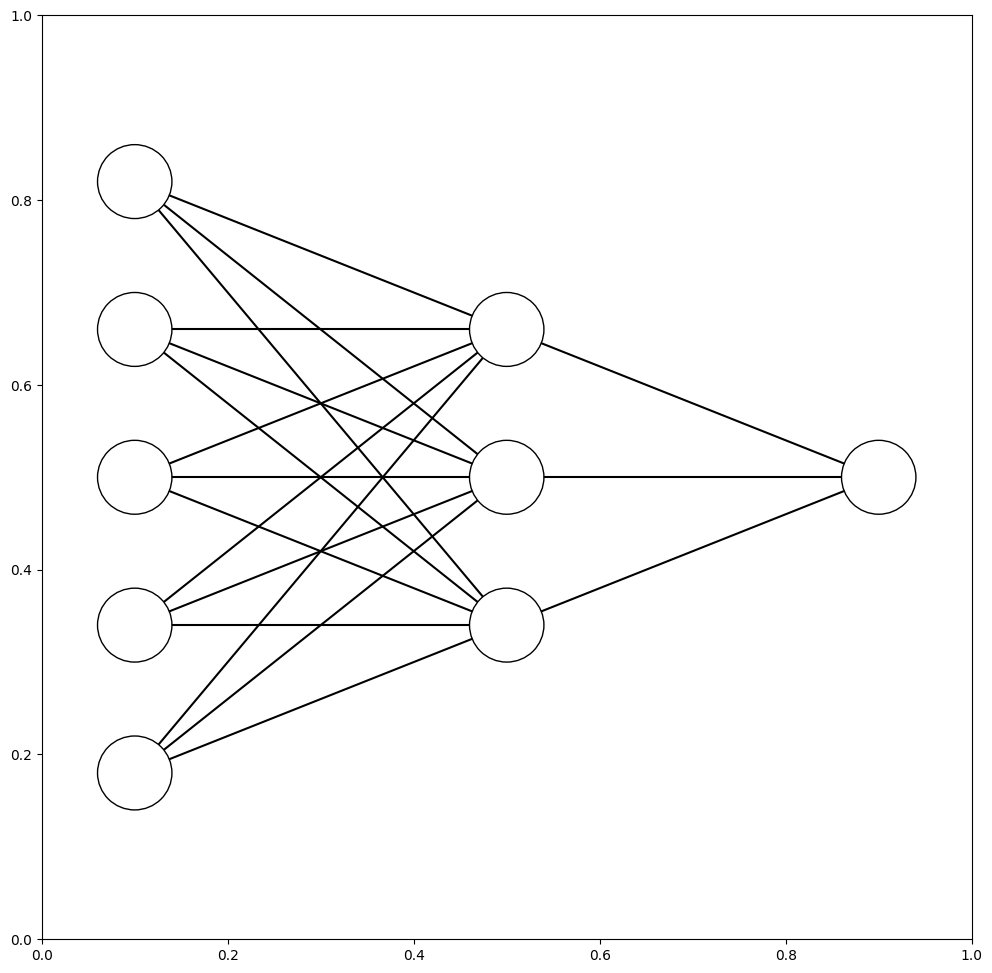

We'll use `ReLu` in hiddenn layer and `Sigmoid` in outer layer. 

In [21]:
class ComplexModel(nn.Module):

    def __init__(self, num_features):
        super().__init__()
        self.linear1 = nn.Linear(in_features=num_features, out_features=3)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(in_features=3,out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, features):
        out = self.linear1(features)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        
        return out

In [22]:
# create model
model_complex = ComplexModel(features.shape[1])

# call the model for forward pass
model_complex(features)

tensor([[0.4943],
        [0.4943],
        [0.4269],
        [0.4451],
        [0.4936],
        [0.4943],
        [0.4815],
        [0.4943],
        [0.4356],
        [0.4943]], grad_fn=<SigmoidBackward0>)

In [33]:
# Show model weights
from pprint import pprint

pprint(f"""Model Weights
    Layer 1 Weights => {model.linear1.weight},
    Layer 1 biases => {model.linear1.bias}""")

('Model Weights\n'
 '    Layer 1 Weights => Parameter containing:\n'
 'tensor([[-0.4280,  0.3294,  0.1713,  0.2208,  0.0230],\n'
 '        [-0.0011,  0.1670, -0.3307, -0.3999, -0.0502],\n'
 '        [ 0.1149, -0.1750, -0.4284, -0.3411, -0.2344]], '
 'requires_grad=True),\n'
 '    Layer 1 biases => Parameter containing:\n'
 'tensor([-0.3955,  0.1159, -0.1181], requires_grad=True)')


In [35]:
# Observing the overall training process through torchinfo
summary(model_complex, input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
ComplexModel                             [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## Sequential Container

Sequential Conatiner is a way to define a neural network where the layers are arranged in linear stack (i.e teh output of one layer becomes the input of next). It is part of `torch.nn` module and allows for simpler and more readble mdoel definitions when the network has a straightforward, non-brancing structure.

Lets take an exmaple and convert our model into sequential containers.

In [40]:
class SeqModel(nn.Module):
    
    def __init__(self, num_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features, 3),
            nn.ReLU(),
            nn.Linear(3,1),
            nn.Sigmoid()
        )
    
    def forward(self, features):
        out = self.network(features)
        return out

In [41]:
# Running the model
seq_model = SeqModel(num_features=features.shape[1])

# Call teh model
seq_model(features)

tensor([[0.4144],
        [0.4144],
        [0.4144],
        [0.4144],
        [0.4144],
        [0.4141],
        [0.4144],
        [0.4144],
        [0.4144],
        [0.4143]], grad_fn=<SigmoidBackward0>)